In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
data=pd.read_csv("SCMS_Delivery_History_Dataset.csv")
pd.set_option('display.max_columns',40)

In [3]:
data.head(5)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


# EDA.......

In [4]:
data.shape

(10324, 33)

In [5]:
data.size

340692

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [7]:
# Analyzing weight cols. 
a=data['Weight (Kilograms)']     # As it seems to be important cols but it has total 8158 records out of 4105 are actual weight 
pd.DataFrame(a)                  #  and rest are string values. So, going to drop this col.
print("Total no of records in weight col :",a.count())
print("Total no of unique values :",a.nunique())

Total no of records in weight col : 10324
Total no of unique values : 4688


In [8]:
data.drop(['ID','Project Code','Weight (Kilograms)','Dosage'], axis = 1,inplace=True)


In [9]:
data.isnull().sum()

PQ #                              0
PO / SO #                         0
ASN/DN #                          0
Country                           0
Managed By                        0
Fulfill Via                       0
Vendor INCO Term                  0
Shipment Mode                   360
PQ First Sent to Client Date      0
PO Sent to Vendor Date            0
Scheduled Delivery Date           0
Delivered to Client Date          0
Delivery Recorded Date            0
Product Group                     0
Sub Classification                0
Vendor                            0
Item Description                  0
Molecule/Test Type                0
Brand                             0
Dosage Form                       0
Unit of Measure (Per Pack)        0
Line Item Quantity                0
Line Item Value                   0
Pack Price                        0
Unit Price                        0
Manufacturing Site                0
First Line Designation            0
Freight Cost (USD)          

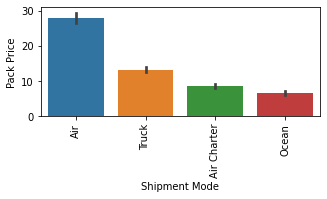

In [10]:
plt.subplots(figsize = (5,2))
plt.xticks(rotation = 90)
sn.barplot('Shipment Mode','Pack Price', data = data)
plt.show()

In [11]:
data['Shipment Mode'].fillna(value='Air', inplace=True)

In [12]:
data['Line Item Insurance (USD)'].mean()

240.11762578459653

In [13]:
data['Line Item Insurance (USD)'].fillna(value=np.mean(data['Line Item Insurance (USD)']),inplace=True)
data['Line Item Insurance (USD)'].mean()

240.11762578459656

In [14]:
data.describe()

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324.000000
mean,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,493.188408
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,30.000000,408.000000,4.314593e+03,4.120000,0.080000,7.030000
50%,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,52.940000
75%,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,241.750000
max,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


## EDA With visualization.......

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5A436BD00>,
      dtype=object)

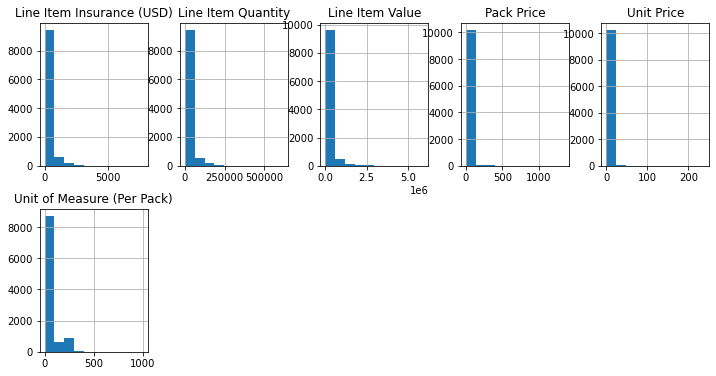

In [15]:
data.hist(bins=10, figsize=(12,30), layout=(9,5)) # checking distribution of numerical cols.......

In [16]:
# Top 10 Countries........

Top 10 Countries Wise Count 

South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Name: Country, dtype: int64


Text(0.5, 0, 'Country Name')

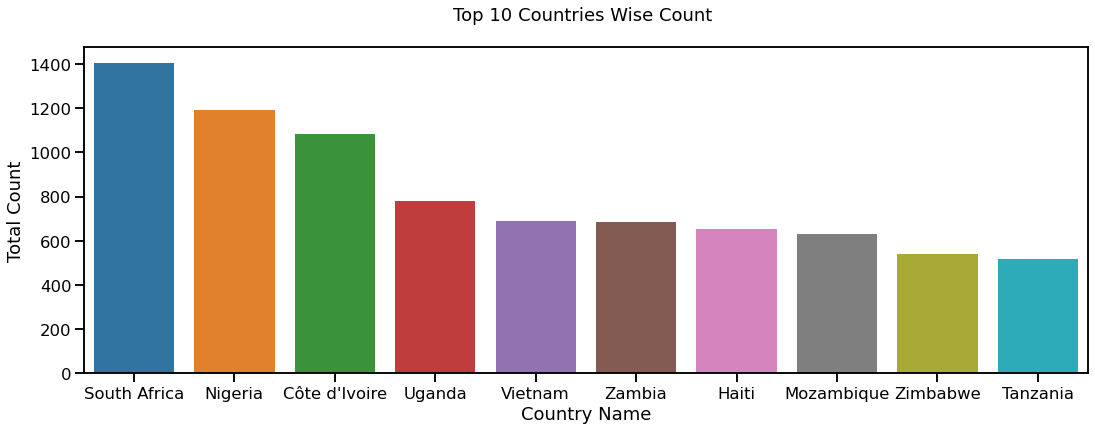

In [17]:
data = data.dropna()
ItemCount = data["Country"].value_counts().nlargest(10)
print("Top 10 Countries Wise Count \n")
print(ItemCount)
sn.set_context("talk",font_scale=1)
plt.figure(figsize=(18,6))
sn.countplot(data['Country'],order = data['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

In [18]:
# 10 higest Pack Price Countries....

Total Pack Price for Top 15 Countries

Country
Nigeria          25620.72
South Africa     24318.90
Côte d'Ivoire    22882.35
Haiti            19521.30
Uganda           15664.08
Mozambique       14092.40
Vietnam          11963.78
Zambia           11889.67
Tanzania         11047.72
Rwanda            7724.29
Name: Pack Price, dtype: float64


Text(0.5, 0, 'Country Name')

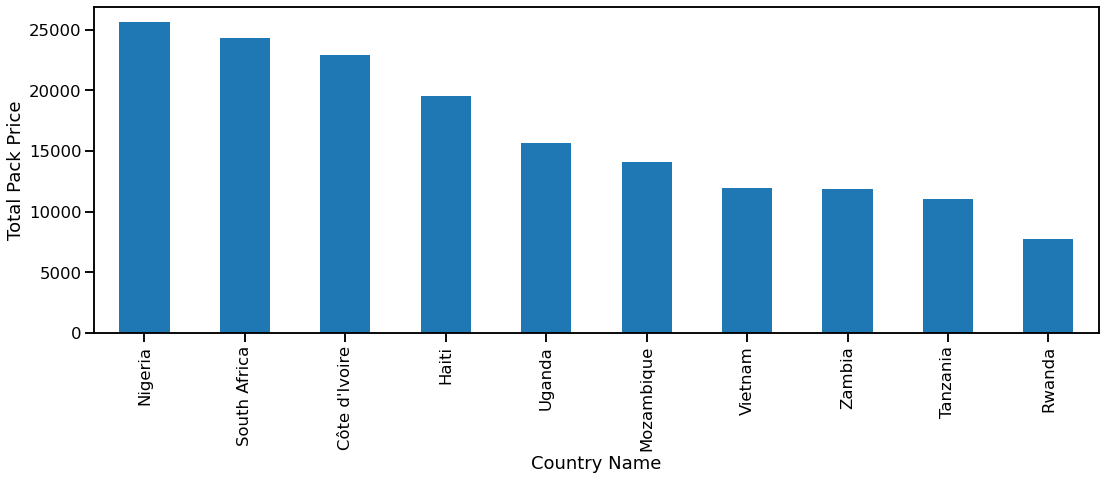

In [19]:
TotalPrice = data.groupby(['Country'])['Pack Price'].sum().nlargest(10)
print("Total Pack Price for Top 15 Countries\n")
print(TotalPrice)
plt.figure(figsize=(18,6))
GraphData=data.groupby(['Country'])['Pack Price'].sum().nlargest(10)
GraphData.plot(kind='bar')
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

In [20]:
# First Line Designation.......

Text(0.5, 0, 'First Line Designation')

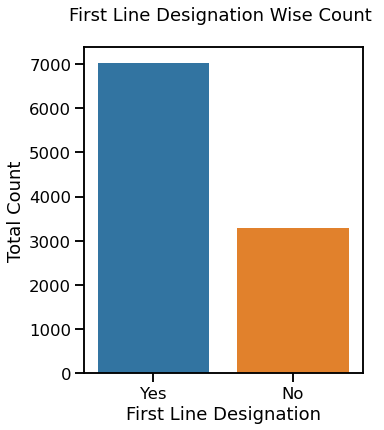

In [21]:
sn.set_context("talk",font_scale=1)
plt.figure(figsize=(5,6))
sn.countplot(data['First Line Designation'],order = data['First Line Designation'].value_counts().nlargest(10).index)
plt.title('First Line Designation Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')


In [22]:
# Unquie Manufacturing Site Names

In [23]:
UniqueItem = data['Manufacturing Site'].unique()
print("Unique Manufacturing Site \n")
UniqueItem

Unique Manufacturing Site 



array(['Ranbaxy Fine Chemicals LTD', 'Aurobindo Unit III, India',
       'ABBVIE GmbH & Co.KG Wiesbaden', 'Ranbaxy, Paonta Shahib, India',
       'MSD South Granville Australia', "ABBVIE (Abbott) St. P'burg USA",
       'ABBVIE Ludwigshafen Germany', 'Trinity Biotech, Plc',
       'EY Laboratories, USA', 'Cipla, Goa, India', 'BMS Meymac, France',
       'Premier Med. Corp Ltd. India', 'Chembio Diagnostics Sys. Inc.',
       'Inverness Japan', 'Pacific Biotech, Thailand',
       'Standard Diagnostics, Korea', 'GSK Mississauga (Canada)',
       'Gilead(Nycomed) Oranienburg DE', 'Bio-Rad Laboratories',
       'Mylan (formerly Matrix) Nashik', 'Roche Basel', 'GSK Ware (UK)',
       'Novartis Pharma AG, Switzerland', 'BI, Ingelheim, Germany',
       'Not Applicable', 'Ipca Dadra/Nagar Haveli IN', 'MSD, Haarlem, NL',
       'Aspen-OSD, Port Elizabeth, SA', 'ABBVIE (Abbott) Logis. UK',
       'Gland Pharma Ltd Pally Factory', 'GSK Aranda',
       'Hetero Unit III Hyderabad IN', 'ABBVIE (Abbot

In [24]:
# max min and mean shipment Mode by air....

In [25]:
ItemData=data[data['Shipment Mode']=='Air']
print ("The Max Air Shipment Mode is :",ItemData['Unit of Measure (Per Pack)'].max())
print ("The Min Air Shipment is :",ItemData['Unit of Measure (Per Pack)'].min())
ItemTypeMean = ItemData['Unit of Measure (Per Pack)'].mean()
print ("The Mean Air Shipment is :", round(ItemTypeMean,2))

The Max Air Shipment Mode is : 1000
The Min Air Shipment is : 1
The Mean Air Shipment is : 82.97


In [26]:
# Top 10 Manufacturing Site for all Shipment Mode with Graph

Manufacturing Site
Aurobindo Unit III, India         3172
Mylan (formerly Matrix) Nashik    1415
Hetero Unit III Hyderabad IN       869
Cipla, Goa, India                  665
Strides, Bangalore, India.         540
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
ABBVIE Ludwigshafen Germany        366
Inverness Japan                    345
ABBVIE (Abbott) Logis. UK          219
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

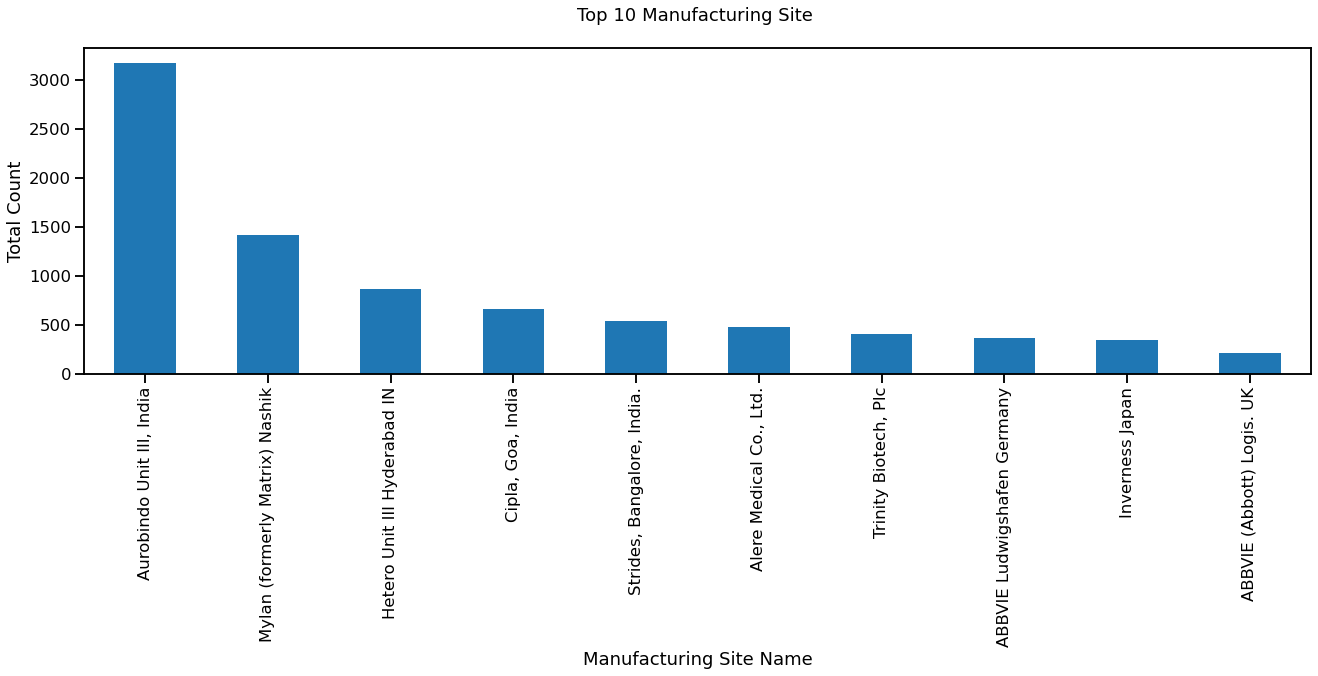

In [27]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=data.groupby('Manufacturing Site').size().nlargest(10)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='bar')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

In [28]:
# Top 10 Manufacturing Site for Air Shipment Mode with Graph

Top 10 Air Manufacturing Site 

Aurobindo Unit III, India         1835
Mylan (formerly Matrix) Nashik     703
Alere Medical Co., Ltd.            473
Hetero Unit III Hyderabad IN       418
Trinity Biotech, Plc               393
Inverness Japan                    328
Cipla, Goa, India                  305
ABBVIE Ludwigshafen Germany        297
Strides, Bangalore, India.         263
ABBVIE (Abbott) Logis. UK          162
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

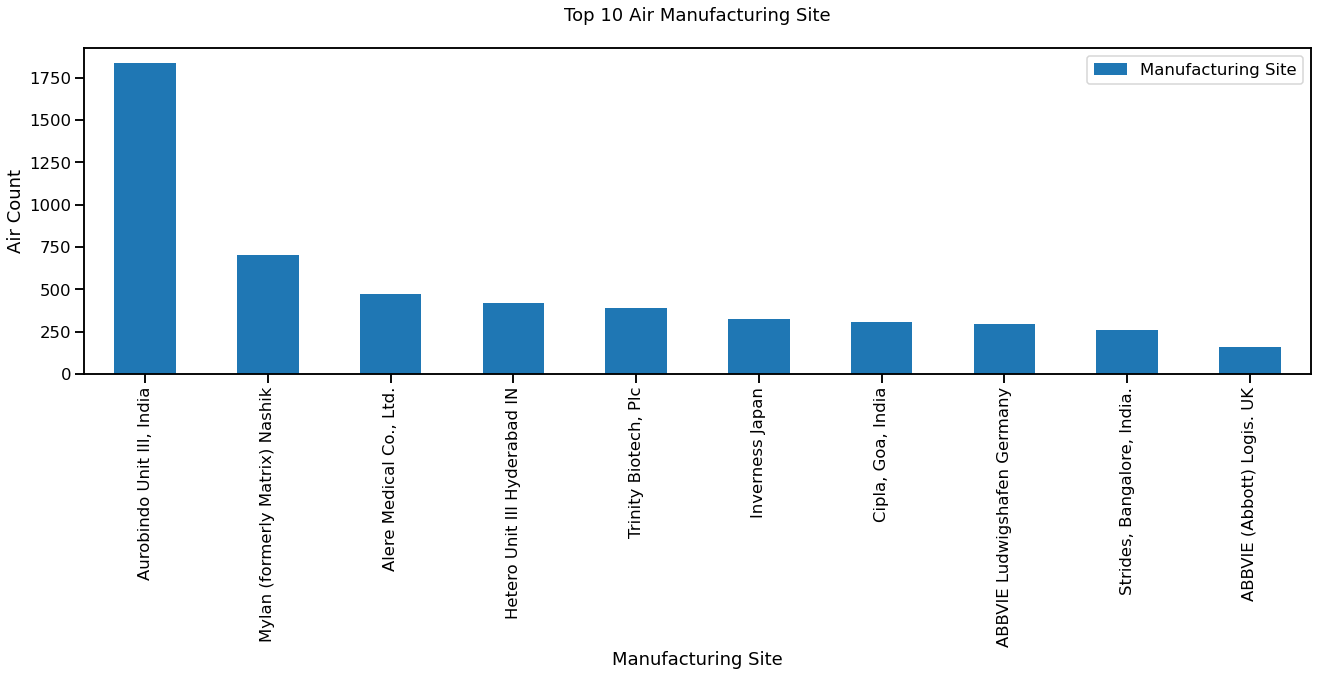

In [29]:
ItemData=data[data['Shipment Mode']=='Air']
data[data["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = data[data["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Air Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top 10 Air Manufacturing Site\n')
plt.ylabel('Air Count')
plt.xlabel('Manufacturing Site')

In [30]:
# Top 10 Manufacturing Site for Truck Shipment Mode with Graph

Top 10 Truck Manufacturing Site 

Aurobindo Unit III, India         892
Mylan (formerly Matrix) Nashik    504
Hetero Unit III Hyderabad IN      352
Cipla, Goa, India                 271
Strides, Bangalore, India.        195
Aurobindo Unit VII, IN             65
ABBVIE (Abbott) Logis. UK          57
ABBVIE Ludwigshafen Germany        56
BMS Meymac, France                 46
Aspen-OSD, Port Elizabeth, SA      34
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

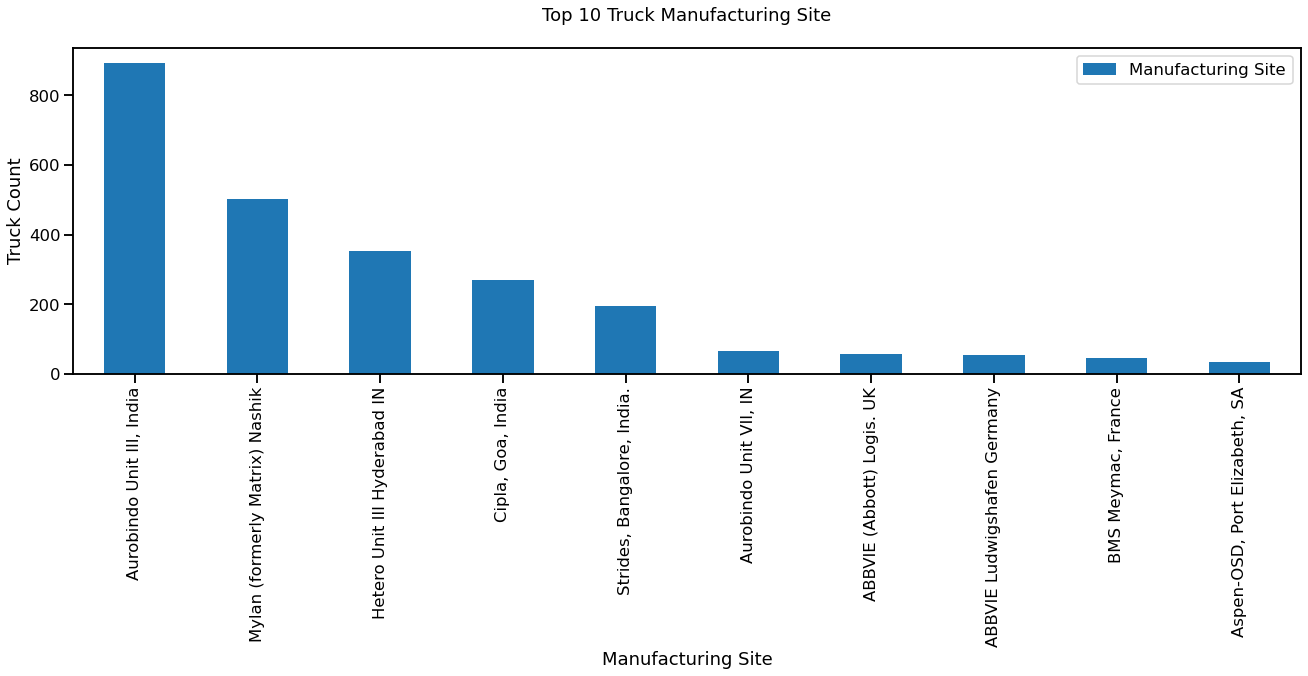

In [31]:
ItemData=data[data['Shipment Mode']=='Truck']
data[data["Shipment Mode"]=='Truck']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = data[data["Shipment Mode"]=='Truck']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Truck Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top 10 Truck Manufacturing Site\n')
plt.ylabel('Truck Count')
plt.xlabel('Manufacturing Site')

In [32]:
# Top 10 Manufacturing Site for Air Charter Shipment Mode with Graph

Top 10 Air Charter Manufacturing Site 

Aurobindo Unit III, India         268
Mylan (formerly Matrix) Nashik    164
Hetero Unit III Hyderabad IN       70
Strides, Bangalore, India.         55
Cipla, Goa, India                  40
Aurobindo Unit VII, IN             12
Aspen-OSD, Port Elizabeth, SA      11
Cipla, Kurkumbh, India              9
ABBVIE Ludwigshafen Germany         8
MSD, Haarlem, NL                    5
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

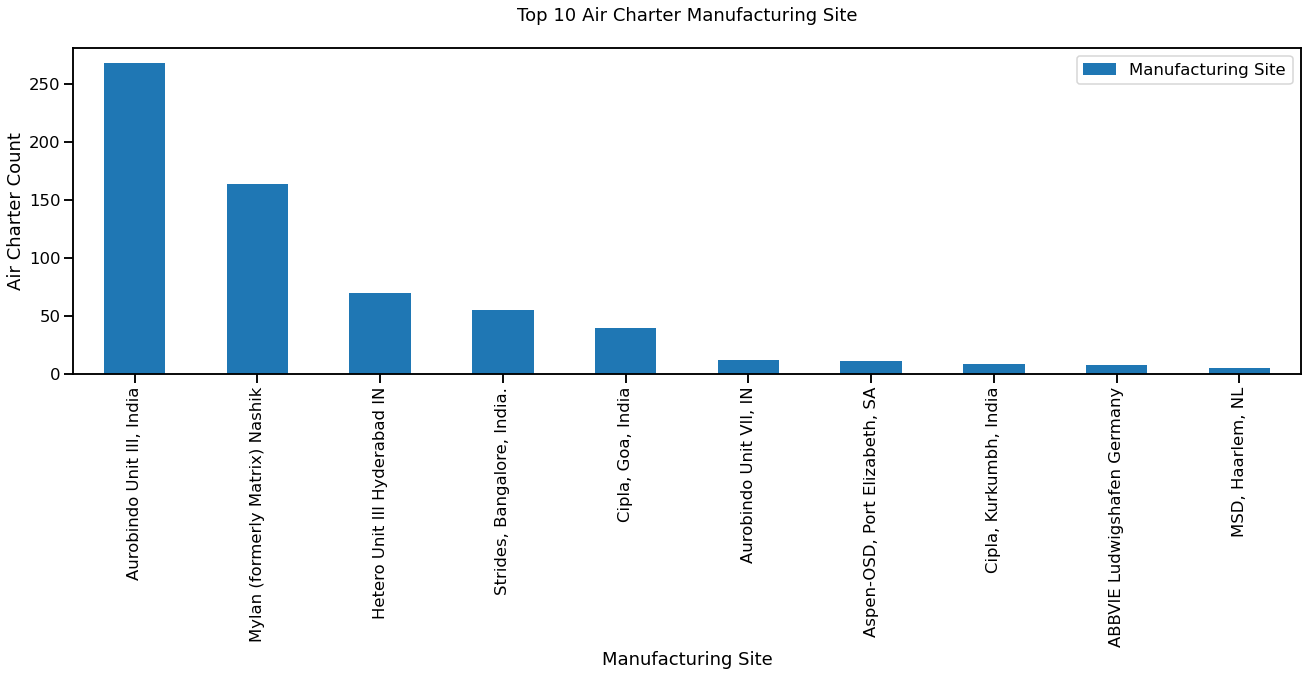

In [33]:
ItemData=data[data['Shipment Mode']=='Air Charter']
data[data["Shipment Mode"]=='Air Charter']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = data[data["Shipment Mode"]=='Air Charter']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Air Charter Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top 10 Air Charter Manufacturing Site\n')
plt.ylabel('Air Charter Count')
plt.xlabel('Manufacturing Site')

In [34]:
# Top 10 Manufacturing Site for Ocean Mode with Graph

Top 10 Ocean Manufacturing Site 

Aurobindo Unit III, India                                                   177
Cipla, Goa, India                                                            49
Mylan (formerly Matrix) Nashik                                               44
Hetero Unit III Hyderabad IN                                                 29
Strides, Bangalore, India.                                                   27
GSK Mississauga (Canada)                                                      9
Aurobindo Unit VII, IN                                                        7
Micro labs, Verna, Goa, India                                                 5
ABBVIE Ludwigshafen Germany                                                   5
Emcure Plot No.P-2, I.T-B.T. Park, Phase II, MIDC, Hinjwadi, Pune, India      5
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

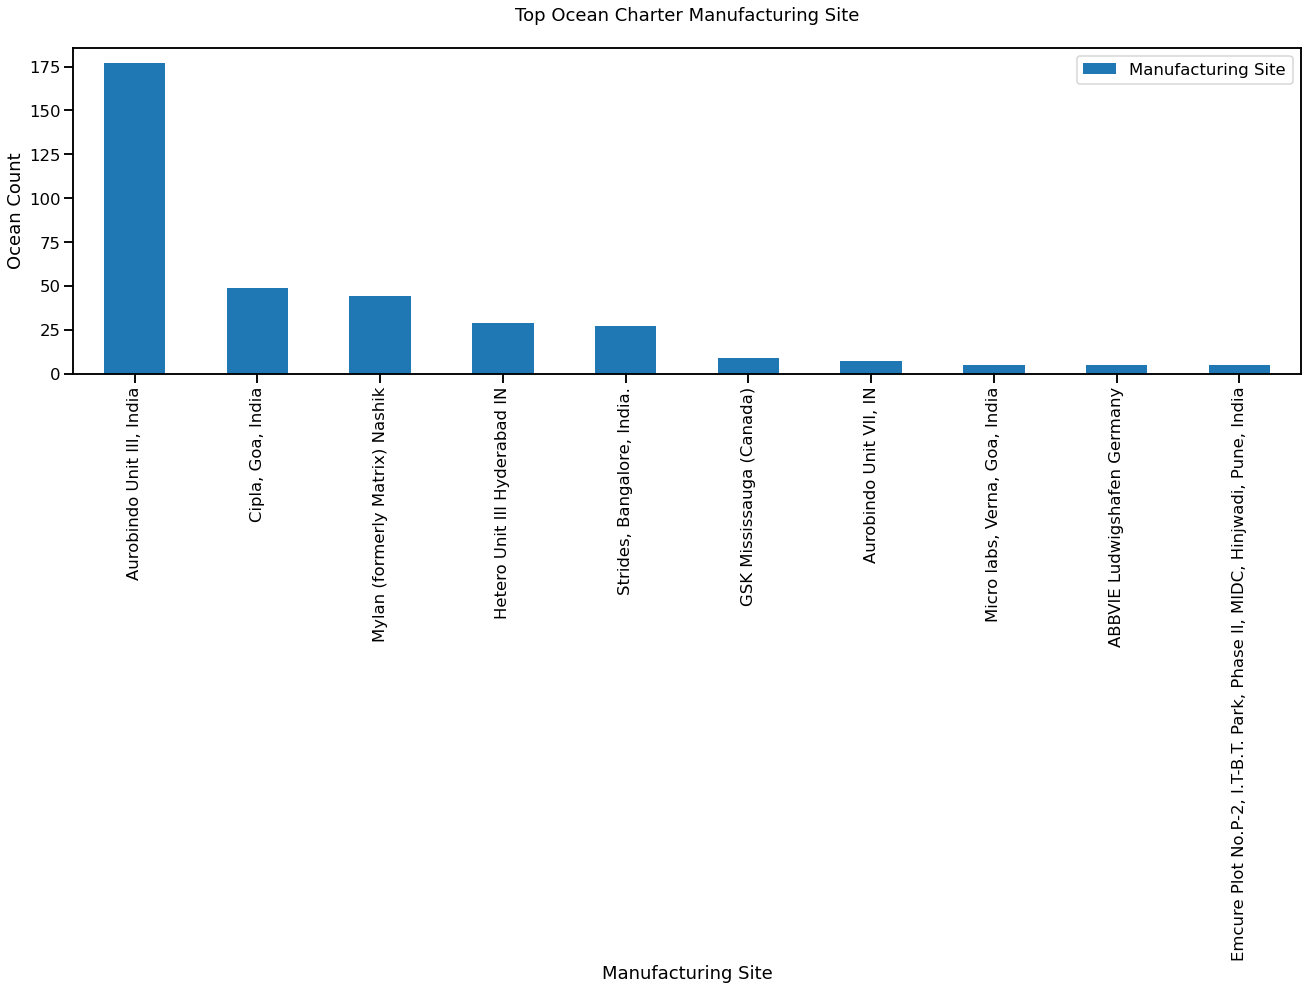

In [35]:
ItemData=data[data['Shipment Mode']=='Ocean']
data[data["Shipment Mode"]=='Ocean']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = data[data["Shipment Mode"]=='Ocean']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Ocean Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top Ocean Charter Manufacturing Site\n')
plt.ylabel('Ocean Count')
plt.xlabel('Manufacturing Site')

In [36]:
# Shipment Mode and Pack Price in Bar Plot Graph

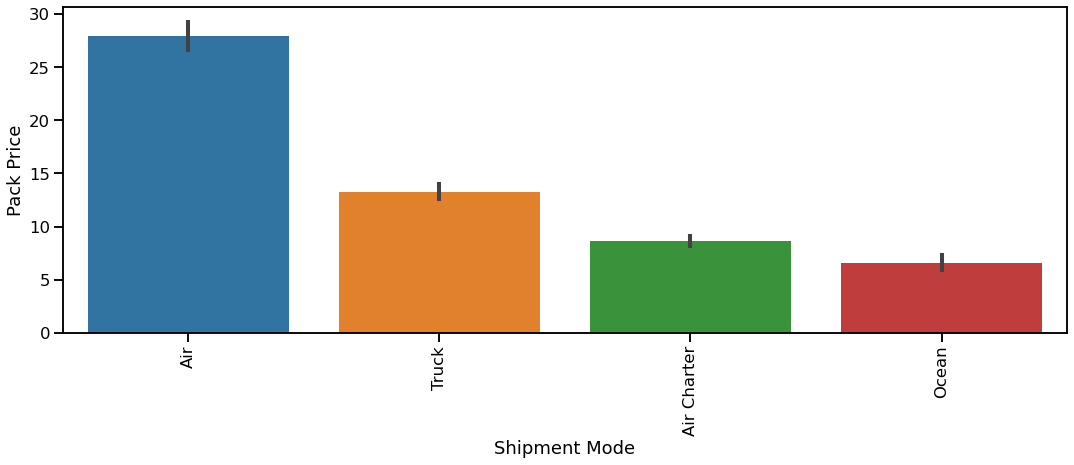

In [37]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sn.barplot('Shipment Mode','Pack Price', data = data)
plt.show()

Conclusion
Top Country for Pack Price : Nigeria - 25,620.72
Top Shipping Mode : Air
The Max Air Shipment Mode is : 1000
The Min Air Shipment is : 1
The Mean Air Shipment is : 82.35
Top Manufacturing Site : Aurobindo Unit III, India - 3172
Top Air Manufacturing Site : Aurobindo Unit III, India - 1694

# Interactive EDA by using Sweetviz library........

In [38]:
import sweetviz as sv

data_report = sv.analyze(data)

data_report.show_html('supply_chain_report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)


Creating Associations graph... DONE!
Report supply_chain_report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [39]:
from IPython.display import IFrame

IFrame(src='./supply_chain_report.html', width=1000, height=500)

# Checking Outliers......

In [40]:
print("""All these 6 numerical columns are having lots of outliers as we can see from the above html report
col Line item quantity has maximum no of outliers.
""")
data.select_dtypes(exclude='object').columns 


All these 6 numerical columns are having lots of outliers as we can see from the above html report
col Line item quantity has maximum no of outliers.



Index(['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
       'Pack Price', 'Unit Price', 'Line Item Insurance (USD)'],
      dtype='object')